# Import necessary modules

In [52]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
from IPython.display import Image

# Load dataset

1. Super_dataset is the final dataset from our previous stage.
2. World_dataset is the dataset for world-wide data.

In [3]:
super_dataset = pd.read_csv('../../../data/stage_I/superDataset.csv')
world_dataset = pd.read_csv('../../../data/stage_II/owid-covid-data.csv')
super_dataset.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-13_cases,2021-03-13_deaths,2021-03-14_cases,2021-03-14_deaths,2021-03-15_cases,2021-03-15_deaths,2021-03-16_cases,2021-03-16_deaths,2021-03-17_cases,2021-03-17_deaths
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,55869,0,0,0,0,0,...,6416,95,6426,95,6471,95,6474,95,6483,96
2,1003,Baldwin County,AL,1,223234,0,0,0,0,0,...,20091,294,20103,294,20210,294,20227,294,20263,295
3,1005,Barbour County,AL,1,24686,0,0,0,0,0,...,2181,53,2184,53,2195,53,2198,53,2199,54
4,1007,Bibb County,AL,1,22394,0,0,0,0,0,...,2479,60,2481,60,2499,60,2508,60,2512,60


In [4]:
world_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
countries = ['Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'United States']

filtered_dataset = world_dataset[world_dataset.location.isin(countries)]

## Get United States data

1. Pull DataFrame whose location is "United States".
2. Fill empty columns with 0 value. Empty columns in this case represents that there are no recorded values
3. Extract year and week number from date column by converting date string to datetime object
    * To group the weekly data, we can use the exact date and get the week number. Since all 7 days of the same week will have the same year and week number, we can group data by year and week number combined.
    * To do that, we use apply and lambda where all date values are converted to datetime and then the year, week, and day are extracted from that.
    * The new values of year and week are added as new column values

In [6]:
us_dataset = world_dataset[world_dataset.location == 'United States'].fillna(0)
us_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
us_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,week,day
68974,USA,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,3
68975,USA,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,4
68976,USA,North America,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,5
68977,USA,North America,United States,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,6
68978,USA,North America,United States,2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,7


<p style='text-align: right;'> Done by Pratik Devkota </p>

## Group data

1. Group data by year and week.
2. Apply mean on each group.
3. Apply lambda function to round each value to its nearest integer value.
4. Append starting date of each week in the aggregated dataframe.

In [7]:
weekly_data = us_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
weekly_data['date'] = weekly_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)
weekly_data.tail()

,year,week,new_cases,new_deaths,date
54,2021,5,117222,2939,2021-02-01
55,2021,6,90947,2463,2021-02-08
56,2021,7,66162,1858,2021-02-15
57,2021,8,67314,1944,2021-02-22
58,2021,9,62149,1953,2021-03-01


<p style='text-align: right;'> Done by Pratik Devkota </p>

## Display aggregated data

For both new_cases and new_deaths, read and display mean, median and mode values.

In [8]:
desc = weekly_data.describe().apply(lambda x: np.round(x).astype('int'))
for i in ['new_cases', 'new_deaths']:
    print("MEAN {0} per WEEK:\t".format(i.upper()), desc[i].loc["mean"])
    print("MEDIAN {0} per WEEK:\t".format(i.upper()), desc[i].loc["50%"])
    for k, v in weekly_data.new_cases.value_counts()[:1].to_dict().items():
        print("MODE {0} per WEEK:\t".format(i.upper()), k, ", frequency:", v)
    print("\n\n")

MEAN NEW_CASES per WEEK:	 70251
MEDIAN NEW_CASES per WEEK:	 43990
MODE NEW_CASES per WEEK:	 0 , frequency: 3



MEAN NEW_DEATHS per WEEK:	 1274
MEDIAN NEW_DEATHS per WEEK:	 957
MODE NEW_DEATHS per WEEK:	 0 , frequency: 3





<p style='text-align: right;'> Done by Pratik Devkota </p>

### Weekly Mean of Cases  
Create general function to obtain weekly mean of new cases for every week since COVID-19 appeared in a country.  
1.) Filter the dataset to contain only data from a specific country.  
2.) Separate the daily date into year, month, and day values.  
3.) Group by the year and week and find the mean value of new cases for each week.  
4.) Return the weekly mean values.  

Author: Erika Sudderth (Generalized function based on Pratik Devkota's code)

In [9]:
def get_weekly_mean(country):
    country_dataset = filtered_dataset[filtered_dataset.location == country].fillna(0)
    country_dataset[['year', 'week', 'day']] = pd.DataFrame(country_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=country_dataset.index)
    week_data = country_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
    week_data['date'] = week_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)

    return week_data['new_cases']

### Weekly Mean of Deaths 
Create general function to obtain weekly mean of new deaths for every week since COVID-19 appeared in a country.  
1.) Filter the dataset to contain only data from a specific country.  
2.) Separate the daily date into year, month, and day values.  
3.) Group by the year and week and find the mean value of new deaths for each week.  
4.) Return the weekly mean values.  

Author: Erika Sudderth (Generalized function based on Pratik Devkota's code)

In [10]:
def get_weekly_mean_deaths(country):
    country_dataset = filtered_dataset[filtered_dataset.location == country].fillna(0)
    country_dataset[['year', 'week', 'day']] = pd.DataFrame(country_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=country_dataset.index)
    week_data = country_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
    week_data['date'] = week_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)
                             
    return week_data['new_deaths']

### Compare Cases Center of 5 Different Countries  
Get the weekly mean, median, and mode for each country and display it in a chart.  

Notes: The mode does not seem to be a good measure of center for this data as it is heavily influenced by the initial stages of COVID-19 when cases were not high. The mode for Pakistan, Brazil, and Bangladesh have multiple values (Pakistan and Brazil has many values and could not be completely displayed). The only country with values comparable to the United States is Brazil (based on mean and median) and even then, the United States' values are significantly higher.  

Author: Erika Sudderth

In [11]:
center_data_chart = go.Figure(data=[go.Table(header=dict(values=['Country', 'Mean', 'Median', 'Mode']),
            cells=dict(values=[['United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh'],
            [math.ceil(get_weekly_mean('United States').mean()), math.ceil(get_weekly_mean('Indonesia').mean()), 
            math.ceil(get_weekly_mean('Pakistan').mean()), math.ceil(get_weekly_mean('Nigeria').mean()), 
            math.ceil(get_weekly_mean('Brazil').mean()),math.ceil(get_weekly_mean('Bangladesh').mean())], 
            [math.ceil(get_weekly_mean('United States').median()), math.ceil(get_weekly_mean('Indonesia').median()), 
            math.ceil(get_weekly_mean('Pakistan').median()), math.ceil(get_weekly_mean('Nigeria').median()), 
            math.ceil(get_weekly_mean('Brazil').median()), math.ceil(get_weekly_mean('Bangladesh').median())], 
            [get_weekly_mean('United States').mode(), get_weekly_mean('Indonesia').mode(), 
            get_weekly_mean('Pakistan').mode(), get_weekly_mean('Nigeria').mode(), 
            get_weekly_mean('Brazil').mode(), get_weekly_mean('Bangladesh').mode()]]))
                     ])
#center_data_chart.update_layout(title_text = 'Cases')

#cases_image = center_data_chart.to_image(format="png")
#Image(cases_image)

### Compare Deaths Center of 5 Different Countries  
Get the weekly mean, median, and mode for each country and display it in a chart.  

Notes: The mode does not seem to be a good measure of center for this data as for some countries it is heavily influenced by the initial stages of COVID-19 when cases were not high. The mode for Indonesia and Pakistan have multiple values. The only country with values comparable to the United States is Brazil (based on mean and median) and even then, the United States' values are significantly higher.  

Author: Erika Sudderth

In [12]:
center_data_chart_deaths = go.Figure(data=[go.Table(header=dict(values=['Country', 'Mean', 'Median', 'Mode']),
        cells=dict(values=[['United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh'],
        [math.ceil(get_weekly_mean_deaths('United States').mean()), math.ceil(get_weekly_mean_deaths('Indonesia').mean()), 
        math.ceil(get_weekly_mean_deaths('Pakistan').mean()), math.ceil(get_weekly_mean_deaths('Nigeria').mean()), 
        math.ceil(get_weekly_mean_deaths('Brazil').mean()),math.ceil(get_weekly_mean_deaths('Bangladesh').mean())], 
        [math.ceil(get_weekly_mean_deaths('United States').median()), math.ceil(get_weekly_mean_deaths('Indonesia').median()), 
        math.ceil(get_weekly_mean_deaths('Pakistan').median()), math.ceil(get_weekly_mean_deaths('Nigeria').median()), 
        math.ceil(get_weekly_mean_deaths('Brazil').median()), math.ceil(get_weekly_mean_deaths('Bangladesh').median())], 
        [get_weekly_mean_deaths('United States').mode(), get_weekly_mean_deaths('Indonesia').mode(), 
        get_weekly_mean_deaths('Pakistan').mode(), get_weekly_mean_deaths('Nigeria').mode(), 
        get_weekly_mean_deaths('Brazil').mode(), get_weekly_mean_deaths('Bangladesh').mode()]]))
                     ])
#center_data_chart_deaths.update_layout(title_text = 'Deaths')
#deaths_image = center_data_chart_deaths.to_image(format="png")
#Image(deaths_image)

**Utilize aggregrate, normalized by population (ex: number of cases per 100,000), difference in cases (new cases), and log normalized values. Author Ashim Chalise.**

Here, I am creating a new table and filling the Nan values with 0.

In [13]:
main_table = filtered_dataset.fillna(0)

Below, I am creating another table for all the cases with only the required columns.

In [14]:
all_cases = main_table[['location','date','new_cases','population']]

Showing what the table looks like below.

In [15]:
all_cases

,location,date,new_cases,population
5689,Bangladesh,2020-03-03,0.0,164689383.0
5690,Bangladesh,2020-03-04,0.0,164689383.0
5691,Bangladesh,2020-03-05,0.0,164689383.0
5692,Bangladesh,2020-03-06,0.0,164689383.0
5693,Bangladesh,2020-03-07,0.0,164689383.0
...,...,...,...,...
69377,United States,2021-02-28,51204.0,331002647.0
69378,United States,2021-03-01,58765.0,331002647.0
69379,United States,2021-03-02,56758.0,331002647.0
69380,United States,2021-03-03,65909.0,331002647.0


Normalizing the value per million population. (per 1 million)

In [16]:
all_cases['norm']=(all_cases.new_cases/all_cases.population)*1000000

<ipython-input-16-1de522d8ecda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Getting log normalized values and replacing negative infinity with 0.

In [17]:
all_cases['log'] = np.log(all_cases['norm']).replace(-np.inf,0)

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log

<ipython-input-17-7dd6be3b6e0d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Below is what the table looks like. Since we have negative log values which does not make sense on a pictorial presentation, I am going to shift the log values. I am going to get the min value from the log table and add it to all the values of the log table so that log value does not go below 0.

In [18]:
all_cases.head(20)

,location,date,new_cases,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,0.000000
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,0.000000
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,0.000000
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,0.000000
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,0.000000
5694,Bangladesh,2020-03-08,3.0,164689383.0,0.018216,-4.005449
5695,Bangladesh,2020-03-09,0.0,164689383.0,0.000000,0.000000
5696,Bangladesh,2020-03-10,0.0,164689383.0,0.000000,0.000000
5697,Bangladesh,2020-03-11,0.0,164689383.0,0.000000,0.000000
5698,Bangladesh,2020-03-12,0.0,164689383.0,0.000000,0.000000


I have created a variable min_log_cases and getting the minimum value from the log column. I display the value and conver the value to a positive number. At last, I add the value to the log column.

In [19]:
min_log_cases = all_cases['log'].min()
min_log_cases
min_log_cases = min_log_cases*-1
all_cases['log']= all_cases['log'] + min_log_cases

<ipython-input-19-f77f615404e4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



I am displaying the table below to show the positive log values.

In [20]:
all_cases

,location,date,new_cases,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,5.802126
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,5.802126
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,5.802126
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,5.802126
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,5.802126
...,...,...,...,...,...,...
69377,United States,2021-02-28,51204.0,331002647.0,154.693627,10.843573
69378,United States,2021-03-01,58765.0,331002647.0,177.536345,10.981302
69379,United States,2021-03-02,56758.0,331002647.0,171.472949,10.946552
69380,United States,2021-03-03,65909.0,331002647.0,199.119254,11.096030


Now, I am doing the same thing for deaths. Creating a table with required columns first.

In [21]:
all_deaths = main_table[['location','date','new_deaths','population']] 

Displaying the table.

In [22]:
all_deaths


,location,date,new_deaths,population
5689,Bangladesh,2020-03-03,0.0,164689383.0
5690,Bangladesh,2020-03-04,0.0,164689383.0
5691,Bangladesh,2020-03-05,0.0,164689383.0
5692,Bangladesh,2020-03-06,0.0,164689383.0
5693,Bangladesh,2020-03-07,0.0,164689383.0
...,...,...,...,...
69377,United States,2021-02-28,1037.0,331002647.0
69378,United States,2021-03-01,1516.0,331002647.0
69379,United States,2021-03-02,1924.0,331002647.0
69380,United States,2021-03-03,2468.0,331002647.0


Normalizing the values per million. ( per 1 million).

In [23]:
all_deaths['norm']=(all_deaths.new_deaths/all_deaths.population)*1000000

<ipython-input-23-ce79a6726c9e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Getting log normalized values here using numpy and removing negative infinity.

In [24]:
all_deaths['log'] = np.log(all_deaths['norm']).replace(-np.inf,0)

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

invalid value encountered in log

<ipython-input-24-c91363248cec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Displaying the table.

In [25]:
all_deaths.head(20)

,location,date,new_deaths,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,0.000000
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,0.000000
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,0.000000
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,0.000000
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,0.000000
5694,Bangladesh,2020-03-08,0.0,164689383.0,0.000000,0.000000
5695,Bangladesh,2020-03-09,0.0,164689383.0,0.000000,0.000000
5696,Bangladesh,2020-03-10,0.0,164689383.0,0.000000,0.000000
5697,Bangladesh,2020-03-11,0.0,164689383.0,0.000000,0.000000
5698,Bangladesh,2020-03-12,0.0,164689383.0,0.000000,0.000000


I have created a variable min_log_deaths to get the min value from the log column. We are going to add the least value from that column to all the values so that we do not end up with a negative value.

In [26]:
min_log_deaths = all_deaths['log'].min()
min_log_deaths
min_log_deaths = min_log_deaths*-1
all_deaths['log']= all_deaths['log'] + min_log_deaths

<ipython-input-26-a3487e655d11>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Displaying the table below.

In [27]:
all_deaths

,location,date,new_deaths,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,5.802126
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,5.802126
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,5.802126
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,5.802126
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,5.802126
...,...,...,...,...,...,...
69377,United States,2021-02-28,1037.0,331002647.0,3.132905,6.944087
69378,United States,2021-03-01,1516.0,331002647.0,4.580024,7.323831
69379,United States,2021-03-02,1924.0,331002647.0,5.812642,7.562162
69380,United States,2021-03-03,2468.0,331002647.0,7.456134,7.811163


#### Plot daily trends (cases and deaths) of US and compare other countries. by Sogol Ghotbi Taheri

dataset for Indonesia (new cases)

In [28]:
indonesia_dataset = filtered_dataset[filtered_dataset.location == 'Indonesia'].fillna(0)
indonesia_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30304,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,0.0,0.0,0.0,0.0,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
30305,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
30306,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,0.0,0.0,0.0,0.0,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
30307,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,0.0,0.0,0.0,0.0,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
30308,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,0.0,0.0,0.0,0.0,...,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718


log dataset for Indonesia (new cases)

In [29]:
indonesia_log_dataset = all_cases[all_cases['location'] == 'Indonesia']
indonesia_log_dataset

,location,date,new_cases,population,norm,log
30304,Indonesia,2020-03-02,2.0,273523621.0,0.007312,0.883886
30305,Indonesia,2020-03-03,0.0,273523621.0,0.000000,5.802126
30306,Indonesia,2020-03-04,0.0,273523621.0,0.000000,5.802126
30307,Indonesia,2020-03-05,0.0,273523621.0,0.000000,5.802126
30308,Indonesia,2020-03-06,2.0,273523621.0,0.007312,0.883886
...,...,...,...,...,...,...
30667,Indonesia,2021-02-28,5560.0,273523621.0,20.327312,8.814092
30668,Indonesia,2021-03-01,6680.0,273523621.0,24.422022,8.997612
30669,Indonesia,2021-03-02,5712.0,273523621.0,20.883023,8.841063
30670,Indonesia,2021-03-03,6808.0,273523621.0,24.889989,9.016592


dataset for Brazil (new cases)

In [30]:
brazil_dataset = filtered_dataset[filtered_dataset.location == 'Brazil'].fillna(0)
brazil_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9355,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9356,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9357,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9358,BRA,South America,Brazil,2020-02-29,2.0,1.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765
9359,BRA,South America,Brazil,2020-03-01,2.0,0.0,0.0,0.0,0.0,0.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765


log dataset for Brazil (new cases)

In [31]:
brazil_log_dataset = all_cases[all_cases['location'] == 'Brazil']
brazil_log_dataset

,location,date,new_cases,population,norm,log
9355,Brazil,2020-02-26,1.0,212559409.0,0.004705,0.442905
9356,Brazil,2020-02-27,0.0,212559409.0,0.000000,5.802126
9357,Brazil,2020-02-28,0.0,212559409.0,0.000000,5.802126
9358,Brazil,2020-02-29,1.0,212559409.0,0.004705,0.442905
9359,Brazil,2020-03-01,0.0,212559409.0,0.000000,5.802126
...,...,...,...,...,...,...
9723,Brazil,2021-02-28,34027.0,212559409.0,160.082304,10.877814
9724,Brazil,2021-03-01,35742.0,212559409.0,168.150637,10.926987
9725,Brazil,2021-03-02,59925.0,212559409.0,281.921183,11.443754
9726,Brazil,2021-03-03,71704.0,212559409.0,337.336279,11.623207


dataset for Pakistan (new cases)

In [32]:
pakistan_dataset = filtered_dataset[filtered_dataset.location == 'Pakistan'].fillna(0)
pakistan_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
49794,PAK,Asia,Pakistan,2020-02-25,2.0,2.0,0.0,0.0,0.0,0.0,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
49795,PAK,Asia,Pakistan,2020-02-26,2.0,0.0,0.0,0.0,0.0,0.0,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
49796,PAK,Asia,Pakistan,2020-02-27,2.0,0.0,0.0,0.0,0.0,0.0,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
49797,PAK,Asia,Pakistan,2020-02-28,4.0,2.0,0.0,0.0,0.0,0.0,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557
49798,PAK,Asia,Pakistan,2020-02-29,4.0,0.0,0.0,0.0,0.0,0.0,...,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.557


log dataset for Pakistan (new cases)

In [33]:
pakistan_log_dataset = all_cases[all_cases['location'] == 'Pakistan']
pakistan_log_dataset

,location,date,new_cases,population,norm,log
49794,Pakistan,2020-02-25,2.0,220892331.0,0.009054,1.097598
49795,Pakistan,2020-02-26,0.0,220892331.0,0.000000,5.802126
49796,Pakistan,2020-02-27,0.0,220892331.0,0.000000,5.802126
49797,Pakistan,2020-02-28,2.0,220892331.0,0.009054,1.097598
49798,Pakistan,2020-02-29,0.0,220892331.0,0.000000,5.802126
...,...,...,...,...,...,...
50163,Pakistan,2021-02-28,1392.0,220892331.0,6.301713,7.642948
50164,Pakistan,2021-03-01,1163.0,220892331.0,5.265008,7.463209
50165,Pakistan,2021-03-02,1388.0,220892331.0,6.283604,7.640070
50166,Pakistan,2021-03-03,1519.0,220892331.0,6.876653,7.730258


dataset for Nigeria (new cases)

In [34]:
nigeria_dataset = filtered_dataset[filtered_dataset.location == 'Nigeria'].fillna(0)
nigeria_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
47477,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,0.0,0.0,0.0,0.0,...,5338.454,0.0,181.013,2.42,0.6,10.8,41.949,0.0,54.69,0.539
47478,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,0.0,0.0,0.0,0.0,...,5338.454,0.0,181.013,2.42,0.6,10.8,41.949,0.0,54.69,0.539
47479,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,0.0,0.0,0.0,0.0,...,5338.454,0.0,181.013,2.42,0.6,10.8,41.949,0.0,54.69,0.539
47480,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,0.0,0.0,0.0,0.0,...,5338.454,0.0,181.013,2.42,0.6,10.8,41.949,0.0,54.69,0.539
47481,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,0.0,0.0,0.0,0.0,...,5338.454,0.0,181.013,2.42,0.6,10.8,41.949,0.0,54.69,0.539


log dataset for Nigeria (new cases)

In [35]:
nigeria_log_dataset = all_cases[all_cases['location'] == 'Nigeria']
nigeria_log_dataset

,location,date,new_cases,population,norm,log
47477,Nigeria,2020-02-28,1.0,206139587.0,0.004851,0.473573
47478,Nigeria,2020-02-29,0.0,206139587.0,0.000000,5.802126
47479,Nigeria,2020-03-01,0.0,206139587.0,0.000000,5.802126
47480,Nigeria,2020-03-02,0.0,206139587.0,0.000000,5.802126
47481,Nigeria,2020-03-03,0.0,206139587.0,0.000000,5.802126
...,...,...,...,...,...,...
47843,Nigeria,2021-02-28,240.0,206139587.0,1.164260,5.954212
47844,Nigeria,2021-03-01,360.0,206139587.0,1.746389,6.359677
47845,Nigeria,2021-03-02,479.0,206139587.0,2.323668,6.645273
47846,Nigeria,2021-03-03,464.0,206139587.0,2.250902,6.613457


dataset for Bangladesh (new cases)

In [36]:
bangladesh_dataset = filtered_dataset[filtered_dataset.location == 'Bangladesh'].fillna(0)
bangladesh_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
5689,BGD,Asia,Bangladesh,2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
5690,BGD,Asia,Bangladesh,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
5691,BGD,Asia,Bangladesh,2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
5692,BGD,Asia,Bangladesh,2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632
5693,BGD,Asia,Bangladesh,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


log dataset for Bangladesh (new cases)

In [37]:
bangladesh_log_dataset = all_cases[all_cases['location'] == 'Bangladesh']
bangladesh_log_dataset

,location,date,new_cases,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,5.802126
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,5.802126
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,5.802126
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,5.802126
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,5.802126
...,...,...,...,...,...,...
6051,Bangladesh,2021-02-28,385.0,164689383.0,2.337734,6.651309
6052,Bangladesh,2021-03-01,585.0,164689383.0,3.552142,7.069677
6053,Bangladesh,2021-03-02,515.0,164689383.0,3.127099,6.942232
6054,Bangladesh,2021-03-03,614.0,164689383.0,3.728231,7.118060


dataset for US (new cases)

In [38]:
us_dataset = filtered_dataset[filtered_dataset.location == 'United States'].fillna(0)
us_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68974,USA,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
68975,USA,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
68976,USA,North America,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
68977,USA,North America,United States,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926
68978,USA,North America,United States,2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926


log dataset for US (new cases)

In [39]:
us_log_dataset = all_cases[all_cases['location'] == 'United States']
us_log_dataset

,location,date,new_cases,population,norm,log
68974,United States,2020-01-22,0.0,331002647.0,0.000000,5.802126
68975,United States,2020-01-23,0.0,331002647.0,0.000000,5.802126
68976,United States,2020-01-24,1.0,331002647.0,0.003021,0.000000
68977,United States,2020-01-25,0.0,331002647.0,0.000000,5.802126
68978,United States,2020-01-26,3.0,331002647.0,0.009063,1.098612
...,...,...,...,...,...,...
69377,United States,2021-02-28,51204.0,331002647.0,154.693627,10.843573
69378,United States,2021-03-01,58765.0,331002647.0,177.536345,10.981302
69379,United States,2021-03-02,56758.0,331002647.0,171.472949,10.946552
69380,United States,2021-03-03,65909.0,331002647.0,199.119254,11.096030


plot new cases for Pakistan, Nigeria, Brazil, US, Indonesia, and Bangladesh

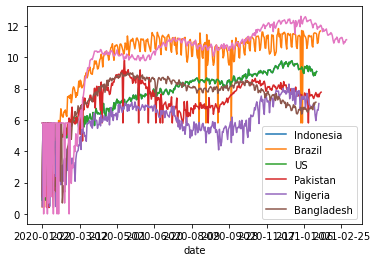

In [40]:
import pandas as pd

ex1 = indonesia_log_dataset.plot(x='date', y='log')
brazil_log_dataset.plot(x='date', y='log', ax=ex1)
indonesia_log_dataset.plot(x='date', y='log', ax=ex1)
pakistan_log_dataset.plot(x='date', y='log', ax=ex1)
nigeria_log_dataset.plot(x='date', y='log', ax=ex1)
bangladesh_log_dataset.plot(x='date', y='log', ax=ex1)
us_log_dataset.plot(x='date', y='log', ax=ex1)
ex1.legend(["Indonesia", "Brazil", "US", "Pakistan", "Nigeria", "Bangladesh"])

log dataset for US (new deaths)

In [41]:
us_log_dataset = all_deaths[all_deaths['location'] == 'United States']
us_log_dataset

,location,date,new_deaths,population,norm,log
68974,United States,2020-01-22,0.0,331002647.0,0.000000,5.802126
68975,United States,2020-01-23,0.0,331002647.0,0.000000,5.802126
68976,United States,2020-01-24,0.0,331002647.0,0.000000,5.802126
68977,United States,2020-01-25,0.0,331002647.0,0.000000,5.802126
68978,United States,2020-01-26,0.0,331002647.0,0.000000,5.802126
...,...,...,...,...,...,...
69377,United States,2021-02-28,1037.0,331002647.0,3.132905,6.944087
69378,United States,2021-03-01,1516.0,331002647.0,4.580024,7.323831
69379,United States,2021-03-02,1924.0,331002647.0,5.812642,7.562162
69380,United States,2021-03-03,2468.0,331002647.0,7.456134,7.811163


log dataset for Indonesia (new deaths)

In [42]:
indonesia_log_dataset = all_deaths[all_deaths['location'] == 'Indonesia']
indonesia_log_dataset

,location,date,new_deaths,population,norm,log
30304,Indonesia,2020-03-02,0.0,273523621.0,0.000000,5.802126
30305,Indonesia,2020-03-03,0.0,273523621.0,0.000000,5.802126
30306,Indonesia,2020-03-04,0.0,273523621.0,0.000000,5.802126
30307,Indonesia,2020-03-05,0.0,273523621.0,0.000000,5.802126
30308,Indonesia,2020-03-06,0.0,273523621.0,0.000000,5.802126
...,...,...,...,...,...,...
30667,Indonesia,2021-02-28,185.0,273523621.0,0.676358,5.411094
30668,Indonesia,2021-03-01,159.0,273523621.0,0.581303,5.259643
30669,Indonesia,2021-03-02,193.0,273523621.0,0.705606,5.453429
30670,Indonesia,2021-03-03,203.0,273523621.0,0.742166,5.503944


log dataset for Brazil (new deaths)

In [43]:
brazil_log_dataset = all_deaths[all_deaths['location'] == 'Brazil']
brazil_log_dataset

,location,date,new_deaths,population,norm,log
9355,Brazil,2020-02-26,0.0,212559409.0,0.000000,5.802126
9356,Brazil,2020-02-27,0.0,212559409.0,0.000000,5.802126
9357,Brazil,2020-02-28,0.0,212559409.0,0.000000,5.802126
9358,Brazil,2020-02-29,0.0,212559409.0,0.000000,5.802126
9359,Brazil,2020-03-01,0.0,212559409.0,0.000000,5.802126
...,...,...,...,...,...,...
9723,Brazil,2021-02-28,721.0,212559409.0,3.391993,7.023544
9724,Brazil,2021-03-01,778.0,212559409.0,3.660153,7.099631
9725,Brazil,2021-03-02,1641.0,212559409.0,7.720195,7.845966
9726,Brazil,2021-03-03,1910.0,212559409.0,8.985723,7.997763


log dataset for Pakistan (new deaths)

In [44]:
pakistan_log_dataset = all_deaths[all_deaths['location'] == 'Pakistan']
pakistan_log_dataset

,location,date,new_deaths,population,norm,log
49794,Pakistan,2020-02-25,0.0,220892331.0,0.000000,5.802126
49795,Pakistan,2020-02-26,0.0,220892331.0,0.000000,5.802126
49796,Pakistan,2020-02-27,0.0,220892331.0,0.000000,5.802126
49797,Pakistan,2020-02-28,0.0,220892331.0,0.000000,5.802126
49798,Pakistan,2020-02-29,0.0,220892331.0,0.000000,5.802126
...,...,...,...,...,...,...
50163,Pakistan,2021-02-28,36.0,220892331.0,0.162975,3.987970
50164,Pakistan,2021-03-01,42.0,220892331.0,0.190138,4.142121
50165,Pakistan,2021-03-02,75.0,220892331.0,0.339532,4.721939
50166,Pakistan,2021-03-03,63.0,220892331.0,0.285207,4.547586


log dataset for Nigeria (new deaths)

In [45]:
nigeria_log_dataset = all_deaths[all_deaths['location'] == 'Nigeria']
nigeria_log_dataset

,location,date,new_deaths,population,norm,log
47477,Nigeria,2020-02-28,0.0,206139587.0,0.000000,5.802126
47478,Nigeria,2020-02-29,0.0,206139587.0,0.000000,5.802126
47479,Nigeria,2020-03-01,0.0,206139587.0,0.000000,5.802126
47480,Nigeria,2020-03-02,0.0,206139587.0,0.000000,5.802126
47481,Nigeria,2020-03-03,0.0,206139587.0,0.000000,5.802126
...,...,...,...,...,...,...
47843,Nigeria,2021-02-28,2.0,206139587.0,0.009702,1.166720
47844,Nigeria,2021-03-01,8.0,206139587.0,0.038809,2.553014
47845,Nigeria,2021-03-02,8.0,206139587.0,0.038809,2.553014
47846,Nigeria,2021-03-03,16.0,206139587.0,0.077617,3.246162


log dataset for Bangladesh (new deaths)

In [46]:
bangladesh_log_dataset = all_deaths[all_deaths['location'] == 'Bangladesh']
bangladesh_log_dataset

,location,date,new_deaths,population,norm,log
5689,Bangladesh,2020-03-03,0.0,164689383.0,0.000000,5.802126
5690,Bangladesh,2020-03-04,0.0,164689383.0,0.000000,5.802126
5691,Bangladesh,2020-03-05,0.0,164689383.0,0.000000,5.802126
5692,Bangladesh,2020-03-06,0.0,164689383.0,0.000000,5.802126
5693,Bangladesh,2020-03-07,0.0,164689383.0,0.000000,5.802126
...,...,...,...,...,...,...
6051,Bangladesh,2021-02-28,8.0,164689383.0,0.048576,2.777507
6052,Bangladesh,2021-03-01,8.0,164689383.0,0.048576,2.777507
6053,Bangladesh,2021-03-02,7.0,164689383.0,0.042504,2.643975
6054,Bangladesh,2021-03-03,5.0,164689383.0,0.030360,2.307503


plot new deaths for Pakistan, Nigeria, Brazil, US, Indonesia, and Bangladesh

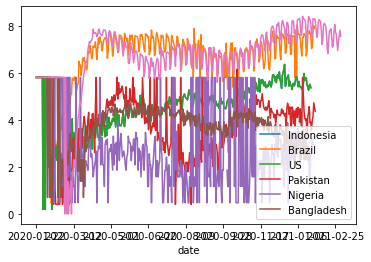

In [47]:
import pandas as pd

ex1 = indonesia_log_dataset.plot(x='date', y='log')
brazil_log_dataset.plot(x='date', y='log', ax=ex1)
indonesia_log_dataset.plot(x='date', y='log', ax=ex1)
pakistan_log_dataset.plot(x='date', y='log', ax=ex1)
nigeria_log_dataset.plot(x='date', y='log', ax=ex1)
bangladesh_log_dataset.plot(x='date', y='log', ax=ex1)
us_log_dataset.plot(x='date', y='log', ax=ex1)
ex1.legend(["Indonesia", "Brazil", "US", "Pakistan", "Nigeria", "Bangladesh"])

#### Extract and prepare the five countries selected in addition to the US separately, filling and taking care of all NAN and negative values, adding date variables (taken from Pratiks) and summing all columns before being analyzed 

In [48]:
us_dataset = filtered_dataset[filtered_dataset.location == 'United States'].fillna(0)
pak_dataset = filtered_dataset[filtered_dataset.location == 'Pakistan'].fillna(0)
nigeria_dataset = filtered_dataset[filtered_dataset.location == 'Nigeria'].fillna(0)
brazil_dataset = filtered_dataset[filtered_dataset.location == 'Brazil'].fillna(0)
desh_dataset = filtered_dataset[filtered_dataset.location == 'Bangladesh'].fillna(0)
indo_dataset = filtered_dataset[filtered_dataset.location == 'Indonesia'].fillna(0)

In [49]:
us_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
pak_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
nigeria_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
brazil_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
indo_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
desh_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)

In [50]:
us_dataset_filter = us_dataset[['location','date','new_cases','new_deaths','week']] 
pak_dataset_filter = pak_dataset[['location','date','new_cases','new_deaths','week']] 
nigeria_dataset_filter = nigeria_dataset[['location','date','new_cases','new_deaths','week']] 
brazil_dataset_filter = brazil_dataset[['location','date','new_cases','new_deaths','week']] 
desh_dataset_filter = desh_dataset[['location','date','new_cases','new_deaths','week']] 
indo_dataset_filter = indo_dataset[['location','date','new_cases','new_deaths','week']] 

In [53]:
us_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')
pak_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')
nigeria_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')
brazil_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')
desh_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')
indo_dataset_filter.groupby(['week'])['new_cases','new_deaths'].agg('sum')

,new_cases,new_deaths
week,,


In [54]:
us_dataset_filter[us_dataset_filter['new_deaths']==us_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
69330,United States,2021-01-12,225999.0,4455.0,2


In [55]:
us_dataset_filter[us_dataset_filter['new_cases']==us_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
69320,United States,2021-01-02,299786.0,2493.0,53


# United States 
### The peak week for new cases in the United States was the second week of 2021 with 299786 new cases

### The peak week for new deaths in the United States was the first week of 2021 with 4455 new deaths

### Both of these peaks are related to the holiday season and new years, where increased  travel and interaction happens

In [56]:
pak_dataset_filter[pak_dataset_filter['new_deaths']==pak_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
50062,Pakistan,2020-11-19,2738.0,313.0,NaN


In [57]:
pak_dataset_filter[pak_dataset_filter['new_cases']==pak_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
49904,Pakistan,2020-06-14,12073.0,178.0,NaN


# Pakistan
### The peak week for new cases in Pakistan was the 47th week of 2020 with 12073 new cases

### The peak week for new deaths in Pakistan was the 25th week of 2020 with 313 new deaths

### The peak cases week can perhaps be correlated to Eid holiday, which sees increased travel and interaction

### The peak deaths week can perhaps be correlated to Diwali know as the festival of the lights, which happened a few weeks earlier, and caused increased travel and interaction

In [58]:
nigeria_dataset_filter[nigeria_dataset_filter['new_deaths']==nigeria_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
47586,Nigeria,2020-06-16,490.0,31.0,NaN


In [59]:
nigeria_dataset_filter[nigeria_dataset_filter['new_cases']==nigeria_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
47807,Nigeria,2021-01-23,2464.0,12.0,NaN


# Nigeria
### The peak week for new cases in Nigeria was the 25th week of 2020 with 2464 new cases

### The peak week for new deaths in Nigeria was the 4th week of 2021 with 31 new deaths

### The peak deaths week can perhaps be correlated to New Years, which sees a increased travel and interaction, since it takes time to diagnose, New Years is a probable  explanation 

### The peak cases week can perhaps be correlated to Eid holiday which was a month earlier from the peak, since it takes time to diagnose, and also democracy day which was week earlier form the peak 

In [60]:
brazil_dataset_filter[brazil_dataset_filter['new_deaths']==brazil_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
9704,Brazil,2021-02-09,74925.0,1986.0,NaN


In [61]:
brazil_dataset_filter[brazil_dataset_filter['new_cases']==brazil_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
9671,Brazil,2021-01-07,87843.0,1524.0,NaN


# Brazil
### The peak week for new cases in Brazil was the 7th week of 2021 with 87843 new cases 

### The peak week for new deaths in Brazil was the 2nd week of 2021 with 1986 new deaths

### The peak cases week can perhaphs be correlated to the New Years, which sees a increased travel and interaction, since it takes time to diagnose, New Years is a probable explanation

### The peak death week can perhaphs be correlated to the New Years which was a month eariler  which sees a increased travel and interaction, and the Brazilian Carnival which is a week later, which may cause people to travel in prepration 

In [62]:
desh_dataset_filter[desh_dataset_filter['new_deaths']==desh_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
5808,Bangladesh,2020-06-30,3682.0,64.0,NaN


In [63]:
desh_dataset_filter[desh_dataset_filter['new_cases']==desh_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
5810,Bangladesh,2020-07-02,4019.0,38.0,NaN


# Bangladesh
### The peak week for new cases in Bangladesh was the 27th week of 2021 with 3682 new cases

### The peak week for new deaths in Bangladesh was the 27th week of 2021 with 64 new deaths

### Both the peak cases and deaths week can perhaps be correlated to the Eid holiday, which was a a month and a half earlier, since it takes time to diagnose and perhaps a variable of limited resources to diagnose, this is a probable cuase

In [64]:
indo_dataset_filter[indo_dataset_filter['new_deaths']==indo_dataset_filter['new_deaths'].max()]

,location,date,new_cases,new_deaths,week
30636,Indonesia,2021-01-28,13695.0,476.0,NaN


In [65]:
indo_dataset_filter[indo_dataset_filter['new_cases']==indo_dataset_filter['new_cases'].max()]

,location,date,new_cases,new_deaths,week
30638,Indonesia,2021-01-30,14518.0,210.0,NaN


# Indonesia
### The peak week for new cases in Indonesia was the 5th week of 2021 with 14518 new cases


### The peak week for new deaths in Indonesia was the 5th week of 2021 with 13695 new deaths


### Both the peak cases and deaths week can perhaphs be correlated to Gregorian New Years which was a month before the peak cases, and also the Chinsese New Years which was a week before the peak, both of these see increased travel and interaction 